In [15]:
import polars as pl
import numpy as np
from scipy.stats import gaussian_kde
from utils import CDNOW_sample, rfm_summary

In [16]:
CDNOW = CDNOW_sample()

rfm_data = rfm_summary(CDNOW)

rfm_data_array = rfm_data.select('P1X', 't_x', 'T', 'zbar').collect().to_numpy()
x = rfm_data_array[:,0] # frequency
zbar = rfm_data_array[:,3] # monetary value
t_x = rfm_data_array[:,1]
T = rfm_data_array[:,2]

Probability density estimate of the sample

In [22]:
m = np.arange(2.5, 301, 2.5) # Average transaction value
kde = gaussian_kde(np.log(zbar[zbar > 0] / 100))
f = kde(np.log(m))
f / m

array([5.69792130e-04, 2.79776521e-03, 4.92607179e-03, 1.82527823e-02,
       3.53830423e-02, 3.62283254e-02, 2.84926042e-02, 2.35857079e-02,
       2.18832783e-02, 2.13654678e-02, 2.07062054e-02, 1.94310619e-02,
       1.77568804e-02, 1.60272097e-02, 1.43892752e-02, 1.28392880e-02,
       1.13525994e-02, 9.93848605e-03, 8.63012121e-03, 7.45970842e-03,
       6.44411008e-03, 5.58294227e-03, 4.86323456e-03, 4.26550553e-03,
       3.76870381e-03, 3.35332003e-03, 3.00286056e-03, 2.70416464e-03,
       2.44705929e-03, 2.22374527e-03, 2.02817363e-03, 1.85554604e-03,
       1.70197544e-03, 1.56428456e-03, 1.43989433e-03, 1.32675448e-03,
       1.22328202e-03, 1.12829032e-03, 1.04090684e-03, 9.60486146e-04,
       8.86528271e-04, 8.18611312e-04, 7.56343346e-04, 6.99334640e-04,
       6.47187587e-04, 5.99499648e-04, 5.55873886e-04, 5.15932069e-04,
       4.79326545e-04, 4.45748463e-04, 4.14931369e-04, 3.86650297e-04,
       3.60717217e-04, 3.36974100e-04, 3.15284906e-04, 2.95527669e-04,
      

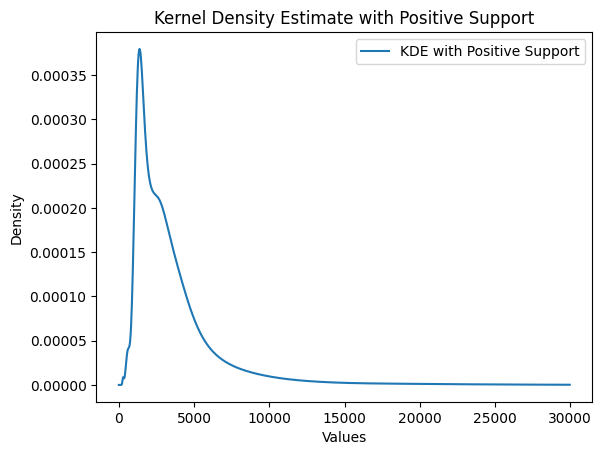

In [24]:
import matplotlib.pyplot as plt

# Input data
zbar = zbar[zbar > 0]  # Keep only positive values

# Transform data to log-scale for positivity constraint
log_zbar = np.log(zbar)

# Perform kernel density estimation in log-space
kde_log = gaussian_kde(log_zbar)

# Define the evaluation points in the original space
m = np.linspace(0.01, np.max(zbar) + 1, 1000)  # Positive values only
log_m = np.log(m)

# Compute the density in log-space and transform back
f_log = kde_log(log_m)
f = f_log / m  # Correct for the log-space transformation

# Normalize the density over positive support
f /= np.trapezoid(f, m)

# Plot results
plt.plot(m, f, label='KDE with Positive Support')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Kernel Density Estimate with Positive Support')
plt.legend()
plt.show()


In [25]:
f

array([0.00000000e+00, 5.68903447e-46, 3.40761596e-25, 1.65722066e-16,
       6.76562835e-12, 3.30535756e-09, 1.38209733e-07, 1.28071605e-06,
       4.42775294e-06, 7.81719978e-06, 8.76843607e-06, 7.79261507e-06,
       7.46265281e-06, 9.36918585e-06, 1.34048057e-05, 1.86809017e-05,
       2.43339109e-05, 2.97177404e-05, 3.43248394e-05, 3.77858038e-05,
       3.99861695e-05, 4.11650871e-05, 4.18967781e-05, 4.29625847e-05,
       4.51834587e-05, 4.92796231e-05, 5.57885608e-05, 6.50386255e-05,
       7.71586804e-05, 9.21032527e-05, 1.09679989e-04, 1.29574442e-04,
       1.51372545e-04, 1.74582839e-04, 1.98659929e-04, 2.23029157e-04,
       2.47111398e-04, 2.70346542e-04, 2.92214440e-04, 3.12252664e-04,
       3.30070826e-04, 3.45361435e-04, 3.57907277e-04, 3.67585175e-04,
       3.74365948e-04, 3.78310416e-04, 3.79561538e-04, 3.78333037e-04,
       3.74895219e-04, 3.69558947e-04, 3.62658898e-04, 3.54537258e-04,
       3.45528863e-04, 3.35948623e-04, 3.26081738e-04, 3.16176940e-04,
      